In [7]:
#Importing and Modifying Data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

datafile = 'SPY.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index)

dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()
pdates = mdates.date2num(data.index)
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

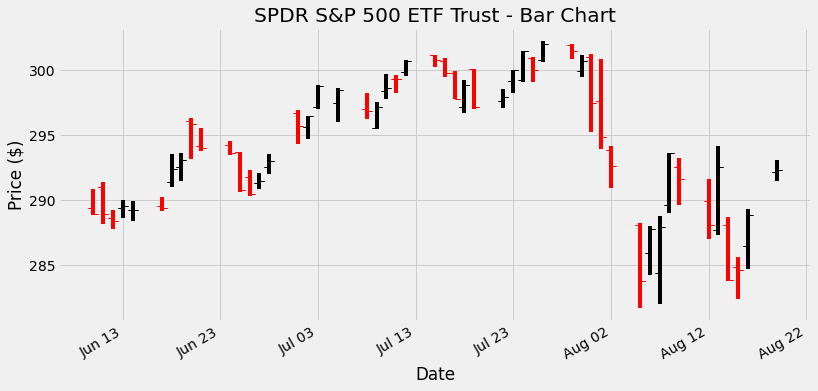

In [8]:
#Beginning with Analytics-I
import mpl_finance as mpf

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

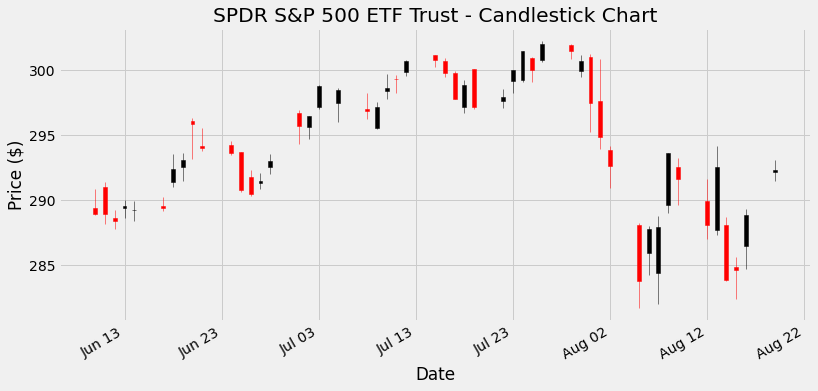

In [9]:
#Beginning with Analytics-II
#Charts having Close > Open are colored in Black
fig, ax = plt.subplots(figsize = (12,6))

mpf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

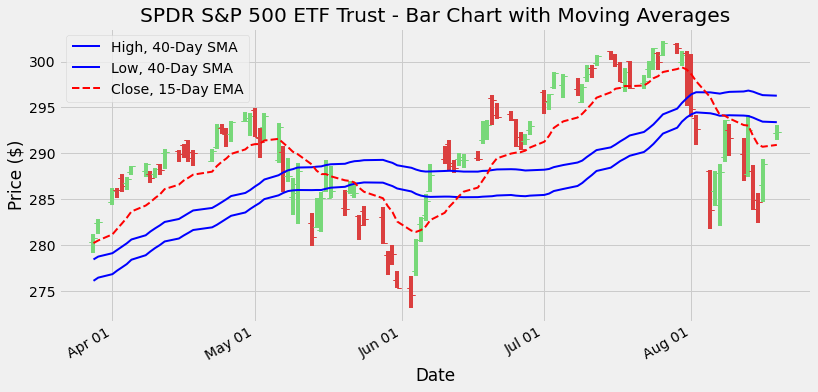

In [10]:
#CamelBack Technique of Stock Trading
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(span=15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()